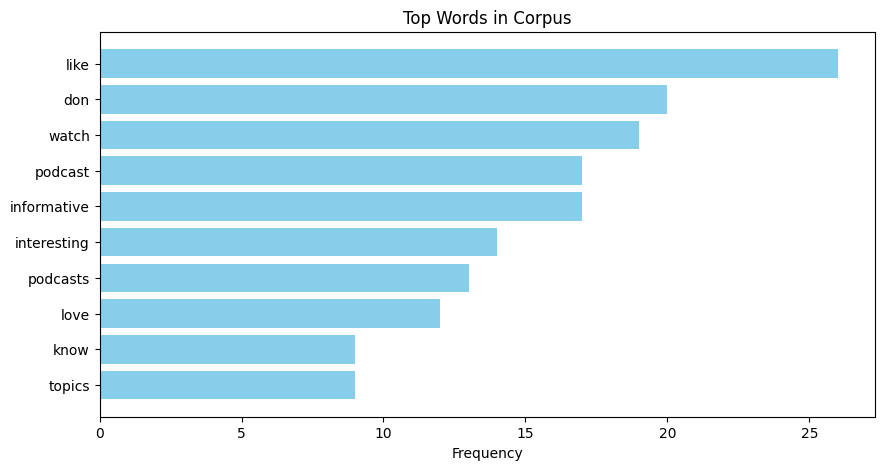

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances

# Step 1: Load your data from the CSV file
df = pd.read_csv(r"C:\Users\User\Downloads\Untitled form (Responses) - Form Responses 1.csv")  # Replace with your CSV file path

# Assuming your comments are in a column named 'Comments'
comments = df['Comments'].astype(str)  # Convert to string in case there are NaNs

# Step 2: Create a bag-of-words representation
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(comments)

# Step 3: Compute the distance matrix
distances = pairwise_distances(X.toarray(), metric='euclidean')

# --- Top Words Visualization ---
word_counts = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()
top_words = pd.DataFrame({'word': words, 'count': word_counts})
top_words = top_words.sort_values(by='count', ascending=False).head(10)

# Plot top words
plt.figure(figsize=(10, 5))
plt.barh(top_words['word'], top_words['count'], color='skyblue')
plt.xlabel('Frequency')
plt.title('Top Words in Corpus')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
plt.show()


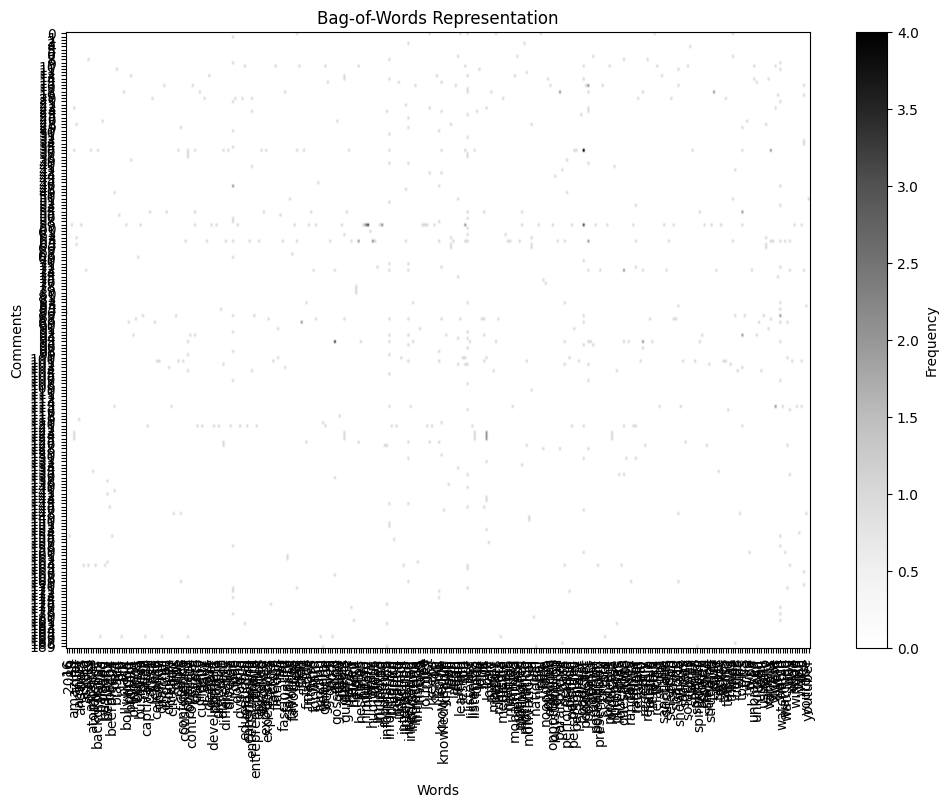

In [3]:
# --- Bag-of-Words Visualization --- 
# Convert bag-of-words to DataFrame for better visualization 
bag_of_words_df = pd.DataFrame(X.toarray(), 
columns=vectorizer.get_feature_names_out()) 
plt.figure(figsize=(12, 8)) 
plt.imshow(bag_of_words_df, cmap='Greys', aspect='auto') 
plt.colorbar(label='Frequency') 
plt.title('Bag-of-Words Representation') 
plt.xlabel('Words') 
plt.ylabel('Comments') 
plt.xticks(ticks=np.arange(len(bag_of_words_df.columns)), 
labels=bag_of_words_df.columns, rotation=90) 
plt.yticks(ticks=np.arange(len(bag_of_words_df)), labels=df.index) 
plt.show() 

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\cluster\hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\Users\User\AppData\Local\Temp\ipykernel_1568\1328408435.py:6: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix_agglo = linkage(distances, method='ward')


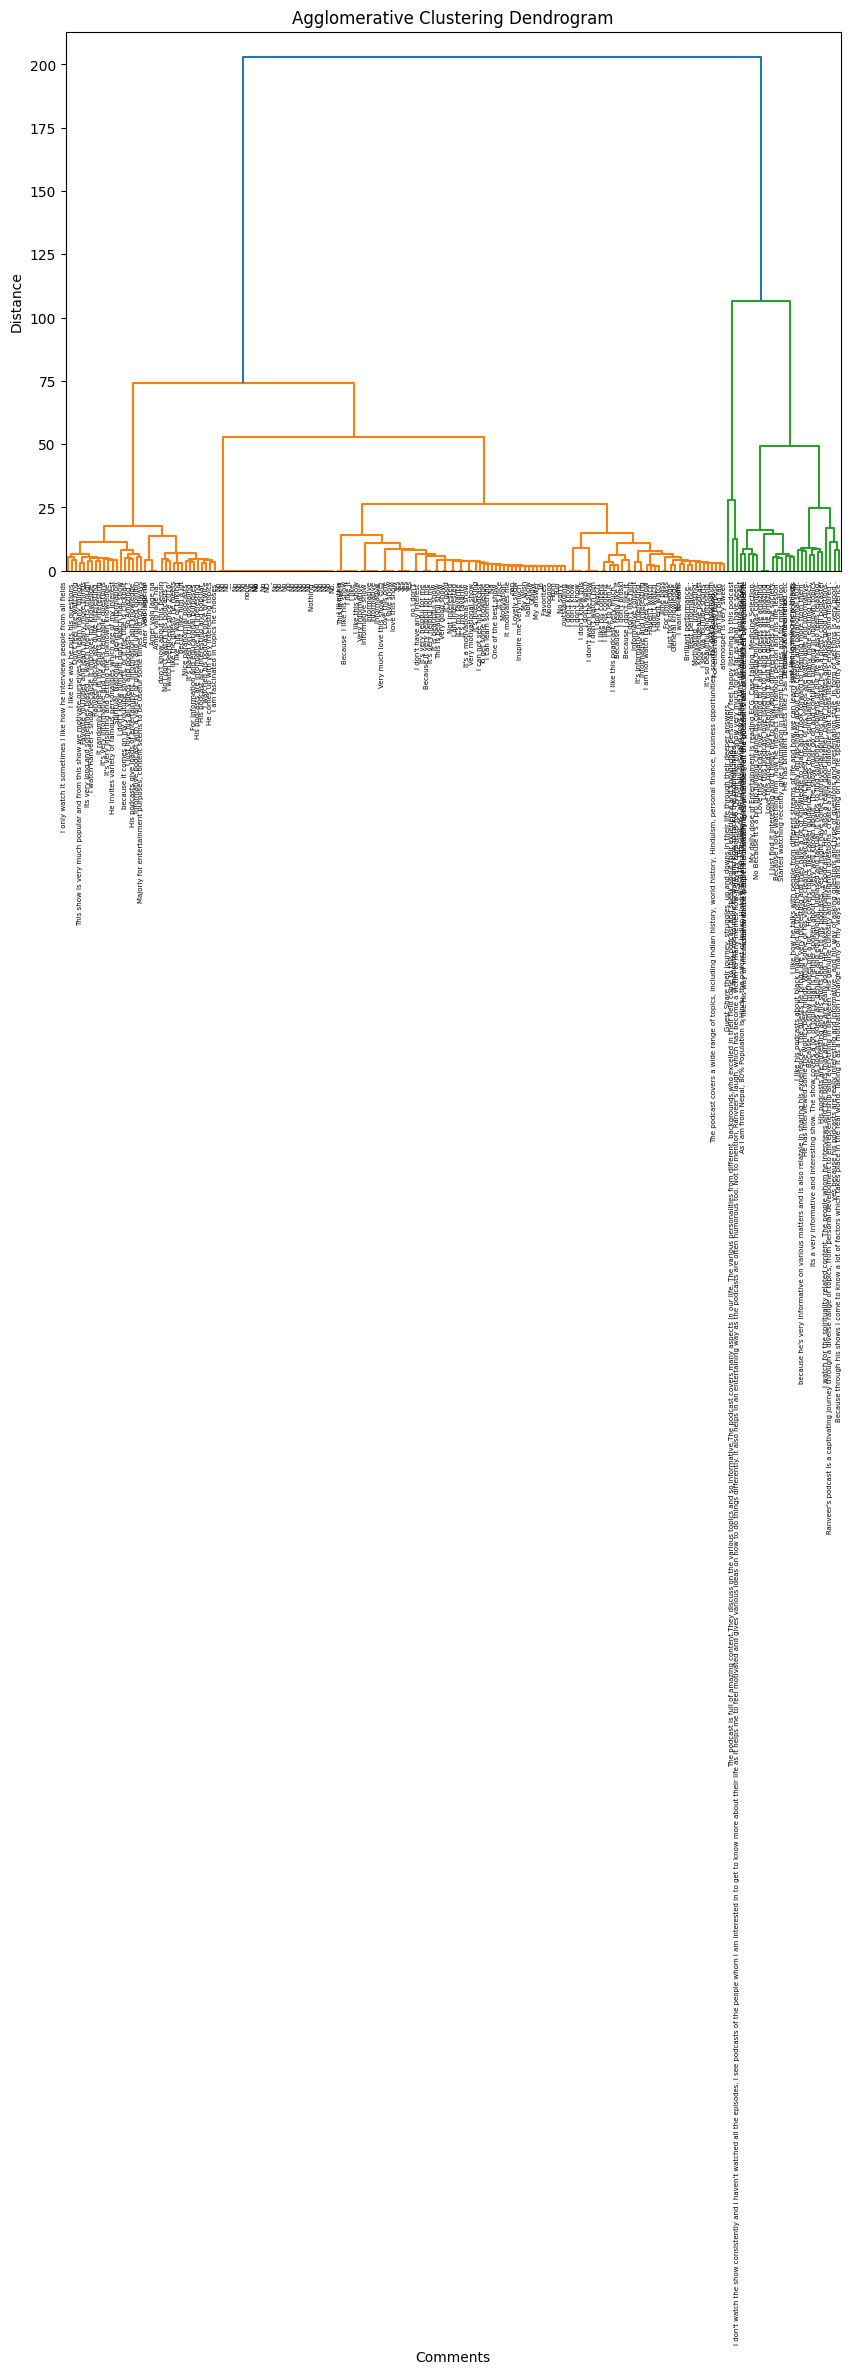

In [4]:
# --- Agglomerative Clustering --- 
# Step 4: Perform Agglomerative Clustering 
agglo_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None) 
agglo_model.fit(distances) 
# Step 5: Plot Dendrogram for Agglomerative Clustering 
linkage_matrix_agglo = linkage(distances, method='ward') 
plt.figure(figsize=(10, 7)) 
dendrogram(linkage_matrix_agglo, labels=comments.values, leaf_rotation=90) 
plt.title('Agglomerative Clustering Dendrogram') 
plt.xlabel('Comments') 
plt.ylabel('Distance') 
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_1568\1093791445.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix_hierarchical = linkage(distances, method='ward')


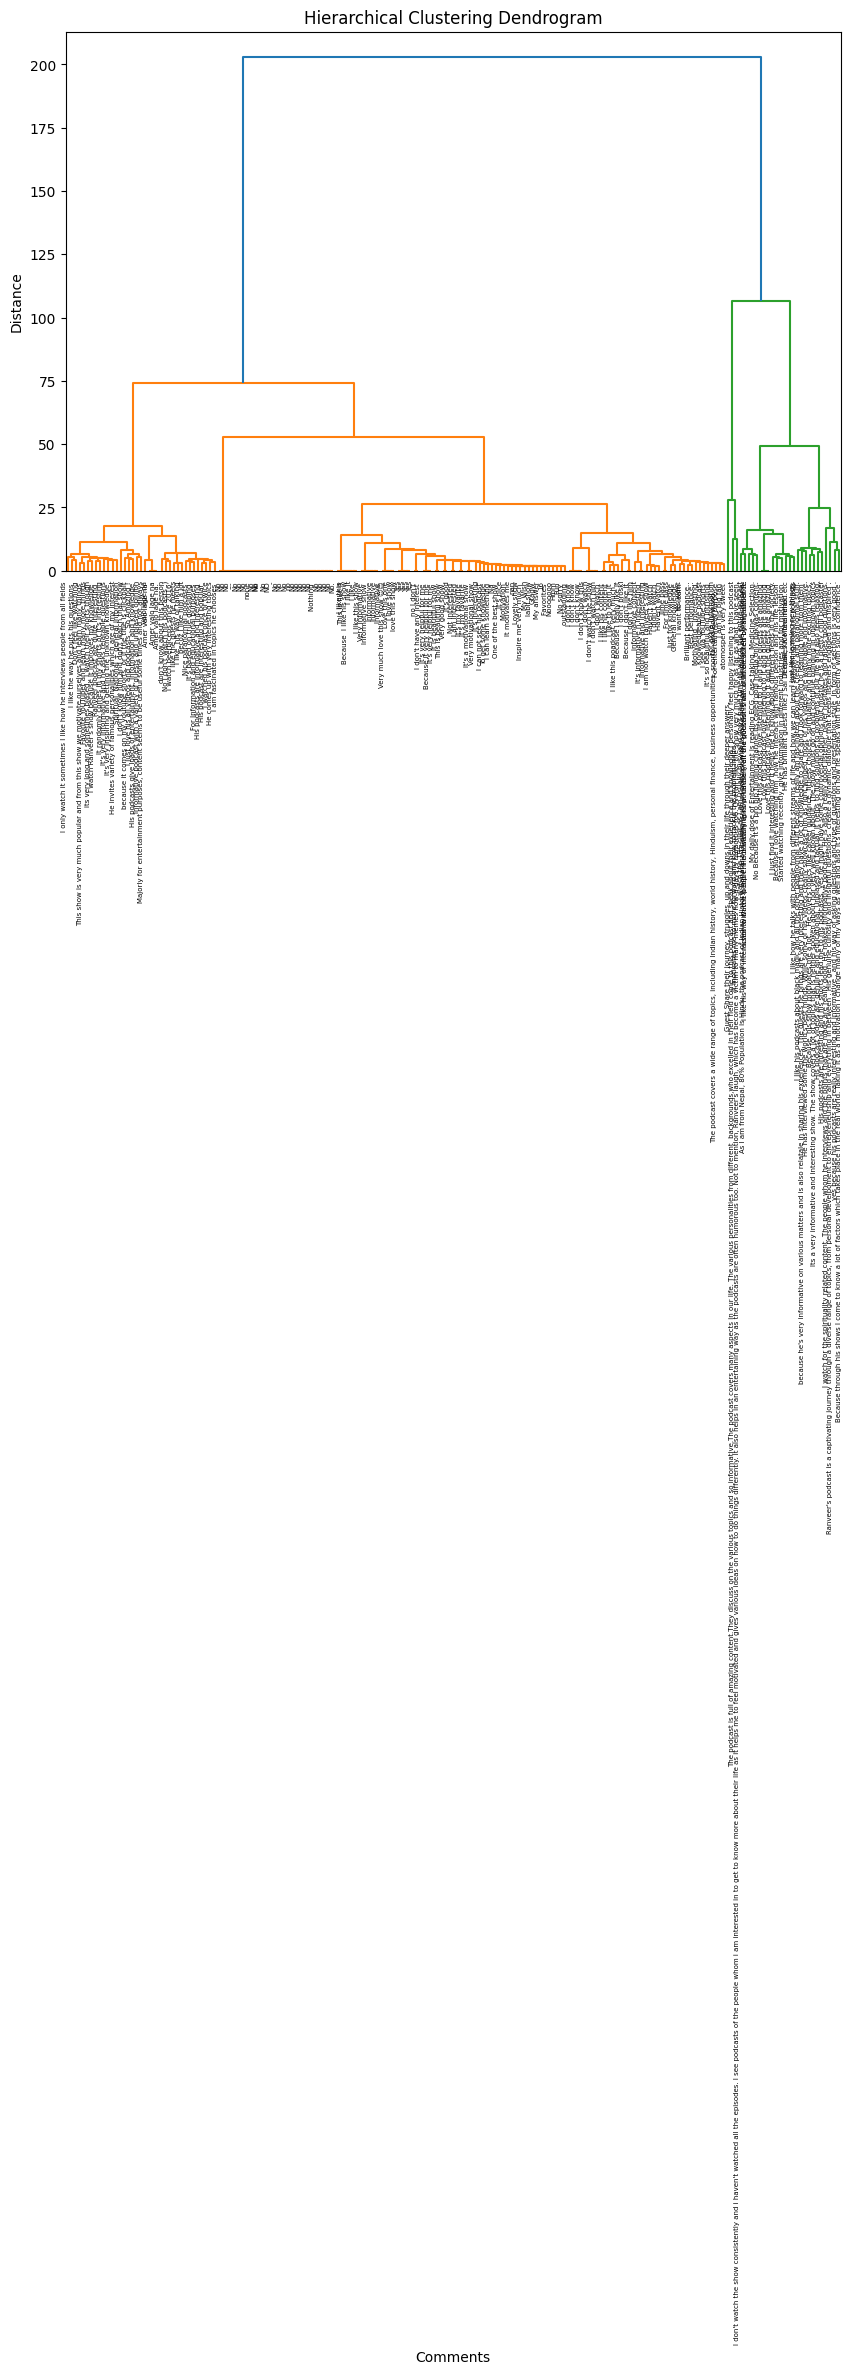

In [5]:
# --- Hierarchical Clustering --- 
# Step 6: Perform Hierarchical Clustering and plot dendrogram 
linkage_matrix_hierarchical = linkage(distances, method='ward') 
plt.figure(figsize=(10, 7)) 
dendrogram(linkage_matrix_hierarchical, labels=comments.values, 
leaf_rotation=90) 
plt.title('Hierarchical Clustering Dendrogram') 
plt.xlabel('Comments') 
plt.ylabel('Distance') 
plt.show() 

In [7]:
from scipy.cluster.hierarchy import linkage, fcluster

# Step 1: Create linkage matrix for agglomerative clustering
linkage_matrix_agglo = linkage(distances, method='ward')

# Optional: Cut the dendrogram to form flat clusters
max_d = 5  # Adjust this threshold based on your dendrogram
clusters_agglo = fcluster(linkage_matrix_agglo, max_d, criterion='distance')

# Adding the cluster labels to the DataFrame
df['agglo_cluster'] = clusters_agglo

# Print out the comments with their corresponding cluster labels
print(df[['Comments', 'agglo_cluster']])


                                              Comments  agglo_cluster
0    It makes me feel relax .\nI just like learning...             44
1                                          no I don't              21
2                                                   No             16
3                            Motivating , Interesting              31
4                                            No sorry              23
..                                                 ...            ...
185                                                 No             16
186  No Because it's a pro bjp funding channel.its ...             38
187                                                 No             16
188                                      For time pass             30
189          Spiritual, National + general information              6

[190 rows x 2 columns]


C:\Users\User\AppData\Local\Temp\ipykernel_1568\3449194800.py:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix_agglo = linkage(distances, method='ward')
